In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import MaxNLocator
import os

In [2]:
# Reading the Excel file from the path
path = "/Users/mahan/Desktop/TEIAS/3th-Semester/Development Economics 1/Project1/Data/TimeSeries_Industry_81-99.xlsx"
df = pd.read_excel(path)

# Replacing the first row as column names
df.columns = df.iloc[0]
# Dropping useless rows (index; 0 to 2)
df = df[3:].reset_index(drop=True)

In [3]:
# Assigning new names to columns
df.columns = [
    "سال", 
    "سطح کد فعالیت", 
    "کد فعالیت", 
    "فعالیت", 
    "تعداد کارگاه", 
    "وضع مالکیت خصوصی (تعاونی)", 
    "وضع مالکیت خصوصی (سایر)", 
    "وضع مالکیت عمومی", 
    "نحوه مدیریت (خصوصی)", 
    "نحوه مدیریت (عمومی)",
    "تعداد شاغلان کل (جمع)",
    "تعداد شاغلان کل (مرد)",
    "تعداد شاغلان کل (زن)",
    "تعداد شاغلان با مزد و حقوق (مرد)",
    "تعداد شاغلان با مزد و حقوق (زن)",
    "تعداد شاغلان بدون مزد و حقوق (مرد)",
    "تعداد شاغلان بدون مزد و حقوق (زن)",
    "جبران خدمات",
    "ارزش مواد خام و اولیه، لوازم بسته‌بندی، ابزار و وسایل کار کم دوام (داخلی و خارجی)",
    "ارزش مواد خام و اولیه، لوازم بسته‌بندی، ابزار و وسایل کار کم دوام (خارجی)",
    "ارزش محصولات تولید شده",
    "ارزش فروش",
    "ارزش صادرات مستقیم (میلیون ریال)",
    "ارزش صادرات مستقیم(معادل به هزار دلار)",
    "ارزش نهاده‌های فعالیت صنعتی",
    "ارزش ستانده‌های فعالیت صنعتی",
    "ارزش افزوده فعالیت صنعتی",
    "ارزش خدمات غیرصنعتی (دریافتی)",
    "ارزش خدمات غیرصنعتی (پرداختی)",
    " مالیات غیرمستقیم و عوارض",
    "تشکیل سرمایه(ارزش تغییرات موجودی انبار)",
    "تشکیل سرمایه (تشکیل سرمایه ثابت)"
]

# Statistical table across industries 
### (Number of Workshops & Export Value)

In [4]:
# Creating a data frame for 1398 across industries
fil_dta = df[df['سال'] == 1398]
fil_dta=fil_dta.iloc[1:]

fil_dta['share_number'] = fil_dta['تعداد کارگاه']/fil_dta['تعداد کارگاه'].sum()*100
fil_dta['share_number'] = fil_dta['share_number'].round(3)

fil_dta = fil_dta.sort_values(by="share_number", ascending=False)

# Keep only the columns 'سال', 'فعالیت', and 'share'
fil_dta = fil_dta[['سال', 'فعالیت','share_number','ارزش صادرات مستقیم(معادل به هزار دلار)']]
fil_dta.head()

,سال,فعالیت,share_number,ارزش صادرات مستقیم(معادل به هزار دلار)
439,1398,توليدساير فراورده هاي معدني غيرفلزي,18.364896,713287
426,1398,توليد فراورده‌هاي غذايي,17.692466,943512
438,1398,توليدفراورده هاي لاستيکي وپلاستيکي,9.091533,468382
441,1398,توليدمحصولات فلزي ساخته شده، به جزماشين آلات و...,8.89941,317973
444,1398,توليد ماشين آلات و تجهيزات طبقه بندي نشده درجا...,6.432688,105536


# choosing Tyre and Plastic industry for Study

In [5]:
df = df[df.iloc[:, 3] == 'توليدفراورده هاي لاستيکي وپلاستيکي']

# Data Summary

In [6]:
# Considering only the columns that have numbers.
columns_to_convert = df.columns[4:]
# Replacing '-' with NaN values
df[columns_to_convert] = df[columns_to_convert].replace('-', pd.NA)  
# Converting these columns to integer type
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)

/var/folders/1r/0hz4dbfx71lc6kk1dqhv91y80000gn/T/ipykernel_9641/271528017.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columns_to_convert] = df[columns_to_convert].replace('-', pd.NA)


# Number of Workshops:

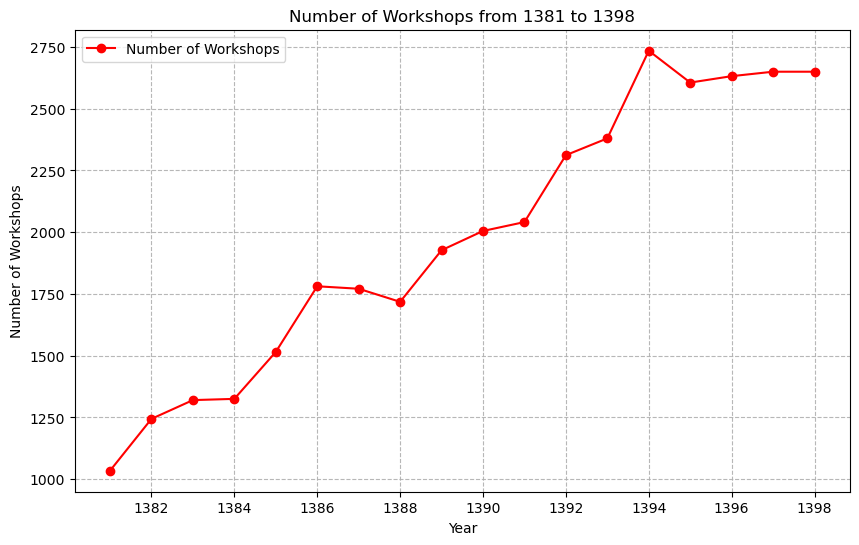

In [7]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['سال'], df['تعداد کارگاه'], marker='o', linestyle='-', color='r', label='Number of Workshops')

plt.title('Number of Workshops from 1381 to 1398')
plt.xlabel('Year')
plt.ylabel('Number of Workshops')
plt.grid(True, linestyle='--', alpha=0.9)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True, prune='lower'))
plt.legend()
plt.show()

# Employee Information:

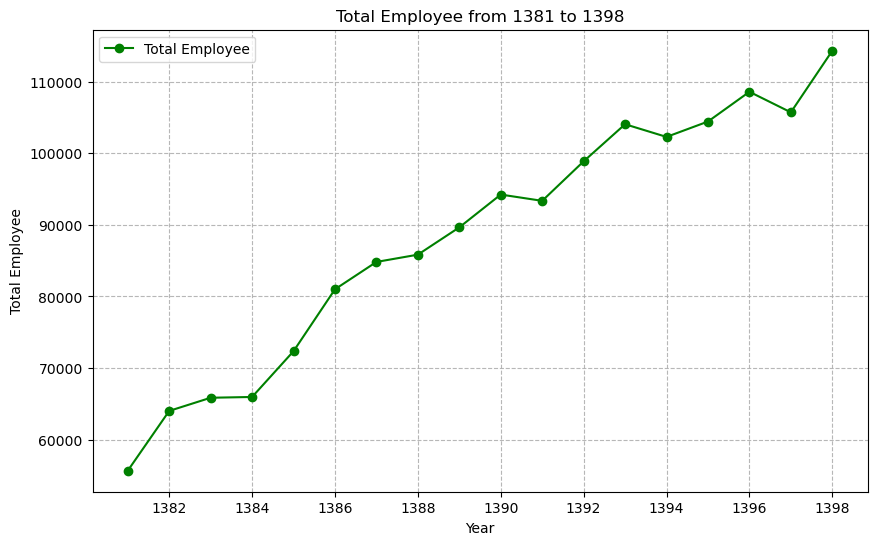

In [8]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['سال'], df['تعداد شاغلان کل (جمع)'], marker='o', linestyle='-', color='g', label='Total Employee')

plt.title('Total Employee from 1381 to 1398')
plt.xlabel('Year')
plt.ylabel('Total Employee')
plt.grid(True, linestyle='--', alpha=0.9)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True, prune='lower'))
plt.legend()
plt.show()

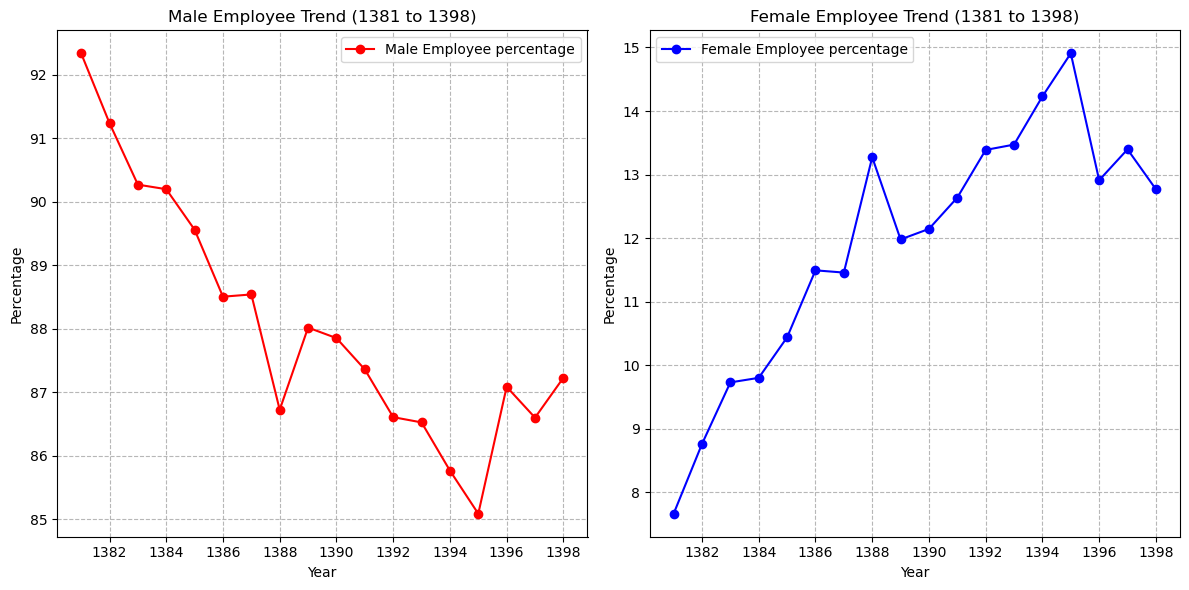

In [9]:
# Calculating Male and Female share of employee
df['Male Employee'] = df['تعداد شاغلان کل (مرد)'] / df['تعداد شاغلان کل (جمع)'] * 100
df['Female Employee'] = df['تعداد شاغلان کل (زن)'] / df['تعداد شاغلان کل (جمع)'] * 100
# Plotting the trends
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Male Employee percentage
axes[0].plot(df['سال'], df['Male Employee'],
             marker='o', linestyle='-', color='r', label='Male Employee percentage')
axes[0].set_title('Male Employee Trend (1381 to 1398)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Percentage')
axes[0].xaxis.set_major_locator(MaxNLocator(integer=True, prune='lower'))
axes[0].grid(True, linestyle='--', alpha=0.9) 
axes[0].legend()

# Female Employee percentage
axes[1].plot(df['سال'], df['Female Employee'],
             marker='o', linestyle='-', color='b', label='Female Employee percentage')
axes[1].set_title('Female Employee Trend (1381 to 1398)')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Percentage')
axes[1].grid(True, linestyle='--', alpha=0.9) 
axes[1].xaxis.set_major_locator(MaxNLocator(integer=True, prune='lower'))
axes[1].legend()


plt.tight_layout()
plt.show()

In [10]:
columns_keep1 = [
    "سال",
    "تعداد شاغلان با مزد و حقوق (مرد)",
    "تعداد شاغلان با مزد و حقوق (زن)",
    "تعداد شاغلان بدون مزد و حقوق (مرد)",
    "تعداد شاغلان بدون مزد و حقوق (زن)"]

# Create the new DataFrame with the specified columns
df_employee = df[columns_keep1]
df_employee.head()

,سال,تعداد شاغلان با مزد و حقوق (مرد),تعداد شاغلان با مزد و حقوق (زن),تعداد شاغلان بدون مزد و حقوق (مرد),تعداد شاغلان بدون مزد و حقوق (زن)
13,1381,50450,4243,941,21
38,1382,57486,5600,917,7
63,1383,58707,6381,736,25
88,1384,58808,6453,686,11
113,1385,64109,7549,690,3


# Production and Sales:

In [11]:
df['انباشت سرمایه'] = df['تشکیل سرمایه(ارزش تغییرات موجودی انبار)'] + df['تشکیل سرمایه (تشکیل سرمایه ثابت)']
columns_keep2 = [
    "سال",
    "ارزش محصولات تولید شده",
    "ارزش فروش",
    'انباشت سرمایه']

df_product = df[columns_keep2]
df_product.head()

,سال,ارزش محصولات تولید شده,ارزش فروش,انباشت سرمایه
13,1381,11014357,17148458,1691199
38,1382,14360963,23534135,2993529
63,1383,18565643,27944289,3931518
88,1384,22642041,32350543,2726558
113,1385,29489418,38902202,4477015


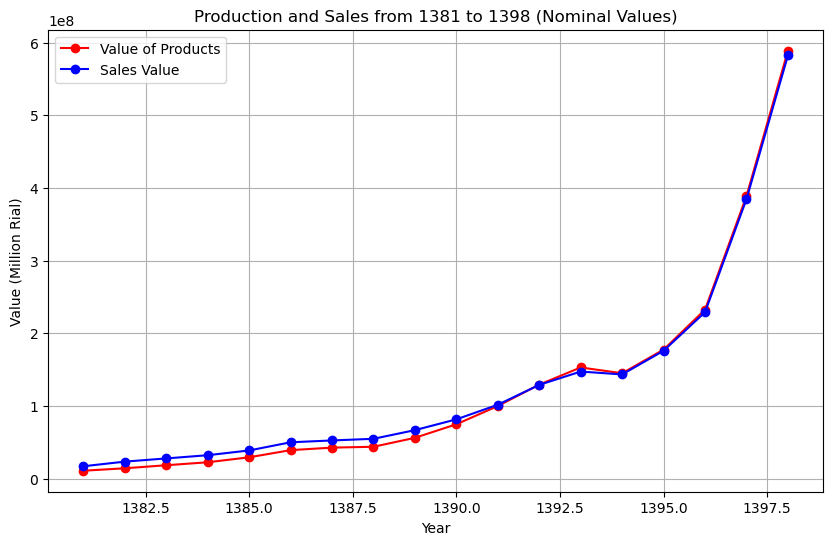

In [12]:
# Plotting
plt.figure(figsize=(10, 6))

plt.plot(df_product['سال'], df_product['ارزش محصولات تولید شده'], label='Value of Products', marker='o',color='r')
plt.plot(df_product['سال'], df_product['ارزش فروش'], label='Sales Value', marker='o',color='b')
#plt.plot(df_product['سال'], df_product['انباشت سرمایه'], label='Capital Accumulation',marker='o', color='g')

plt.xlabel('Year')
plt.ylabel('Value (Million Rial)')
plt.title('Production and Sales from 1381 to 1398 (Nominal Values)')

plt.legend()
plt.grid(True)
plt.show()

# Adding Producer Price Index as a deflator

In [13]:
path1 = "/Users/mahan/Desktop/TEIAS/3th-Semester/Development Economics 1/Project1/Data/Producer_Price_index.xlsx"
df1 = pd.read_excel(path1)

# Replacing the first row as column names
df1.columns = df1.iloc[4]
# Dropping useless rows (index; 0 to 1)
df1 = df1[7:].reset_index(drop=True)
df1.rename(columns={df1.columns[0]: 'سال'}, inplace=True)
df1['سال'] = df1['سال'].astype(str).str.strip() 
df_product['سال'] = df_product['سال'].astype(str).str.strip()  

/Users/mahan/miniconda3/envs/new-env/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/var/folders/1r/0hz4dbfx71lc6kk1dqhv91y80000gn/T/ipykernel_9641/1452866433.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_product['سال'] = df_product['سال'].astype(str).str.strip()


In [14]:
df_real = pd.merge(df_product, df1, on='سال', how='inner')
df_real['ارزش محصولات تولید شده'] = df_real['ارزش محصولات تولید شده']/df_real['شاخص کل']
df_real['ارزش فروش'] = df_real['ارزش فروش']/df_real['شاخص کل']
df_real['انباشت سرمایه'] = df_real['انباشت سرمایه']/df_real['شاخص کل']
df_real.head()

,سال,ارزش محصولات تولید شده,ارزش فروش,انباشت سرمایه,شاخص کل
0,1381,949513.534483,1478315.344828,145793.017241,11.6
1,1382,1071713.656716,1756278.731343,223397.686567,13.4
2,1383,1182525.031847,1779891.019108,250415.159236,15.7
3,1384,1324095.964912,1891844.619883,159447.836257,17.1
4,1385,1552074.631579,2047484.315789,235632.368421,19


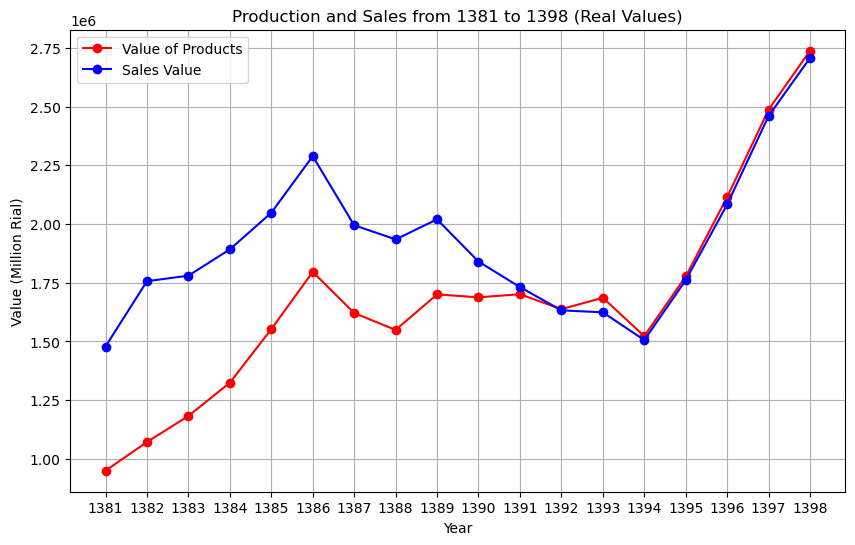

In [15]:
# Plotting
plt.figure(figsize=(10, 6))

plt.plot(df_real['سال'], df_real['ارزش محصولات تولید شده'], label='Value of Products', marker='o',color='r')
plt.plot(df_real['سال'], df_real['ارزش فروش'], label='Sales Value', marker='o',color='b')
#plt.plot(df_real['سال'], df_real['انباشت سرمایه'], label='Capital Accumulation',marker='o', color='g')

plt.xlabel('Year')
plt.ylabel('Value (Million Rial)')
plt.title('Production and Sales from 1381 to 1398 (Real Values)')

plt.legend()
plt.grid(True)
plt.show()

# Utility Consumption:

In [16]:
path1 = "/Users/mahan/Desktop/TEIAS/3th-Semester/Development Economics 1/Project1/Data/Energy & Water/Energy_94-00.xls"
path2 = "/Users/mahan/Desktop/TEIAS/3th-Semester/Development Economics 1/Project1/Data/Energy & Water/Water_94-00.xls"

# Reading the Excel files and select the specific sheets from Energy and Water
sheets5 = pd.read_excel(path1, sheet_name=5, header=1, engine='xlrd')
sheets7 = pd.read_excel(path1, sheet_name=9, header=1, engine='xlrd')
sheeets5 = pd.read_excel(path2, sheet_name=5, header=2, engine='xlrd')
sheeets7 = pd.read_excel(path2, sheet_name=7, header=2, engine='xlrd')

# Choosing only the Tyre and Plastic industry on these files
sheets5.iloc[:, 0] = sheets5.iloc[:, 0].astype(str)
sheets5 = sheets5[sheets5.iloc[:, 0].str.startswith('22')]

sheets7.iloc[:, 0] = sheets7.iloc[:, 0].astype(str)
sheets7 = sheets7[sheets7.iloc[:, 0].str.startswith('22')]

sheeets5.iloc[:, 0] = sheeets5.iloc[:, 0].astype(str)
sheeets5 = sheeets5[sheeets5.iloc[:, 0].str.startswith('22')]

sheeets7.iloc[:, 0] = sheeets7.iloc[:, 0].astype(str)
sheeets7 = sheeets7[sheeets7.iloc[:, 0].str.startswith('22')]

/var/folders/1r/0hz4dbfx71lc6kk1dqhv91y80000gn/T/ipykernel_9641/3695960079.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0      nan
1      nan
2     10.0
3     11.0
4     12.0
5     13.0
6     14.0
7     15.0
8     16.0
9     17.0
10    18.0
11    19.0
12    20.0
13    21.0
14    22.0
15    23.0
16    24.0
17    25.0
18    26.0
19    27.0
20    28.0
21    29.0
22    30.0
23    31.0
24    32.0
25    33.0
Name: کد آیسیک REV4, dtype: object' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  sheets7.iloc[:, 0] = sheets7.iloc[:, 0].astype(str)
/var/folders/1r/0hz4dbfx71lc6kk1dqhv91y80000gn/T/ipykernel_9641/3695960079.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0      nan
1      nan
2     10.0
3     11.0
4     12.0
5     13.0
6     14.0
7     15.0
8     16.0
9     17.0
10    18.0
11    19.0
12 

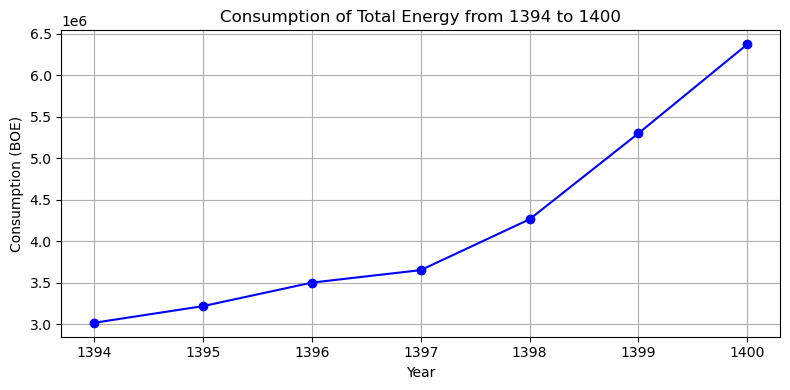

In [17]:
# Reshaping the Sheets from wide to long
total_energy = sheets5.melt(
    id_vars=['کد آیسیک REV4', 'فعالیت'],
    var_name='Year/Variable',
    value_name='Value'
)

# Years from 1394 to 1400
years = list(range(1394, 1401))  

total_energy['Year'] = (total_energy.index % len(years)) + 1394
total_energy = total_energy.drop(columns=['Year/Variable'])

plt.figure(figsize=(8, 4))
plt.plot(total_energy['Year'], total_energy['Value'], marker='o', color='b', label='Value')

plt.title('Consumption of Total Energy from 1394 to 1400')
plt.xlabel('Year')
plt.ylabel('Consumption (BOE)')

plt.grid(True)
plt.tight_layout()
plt.show()

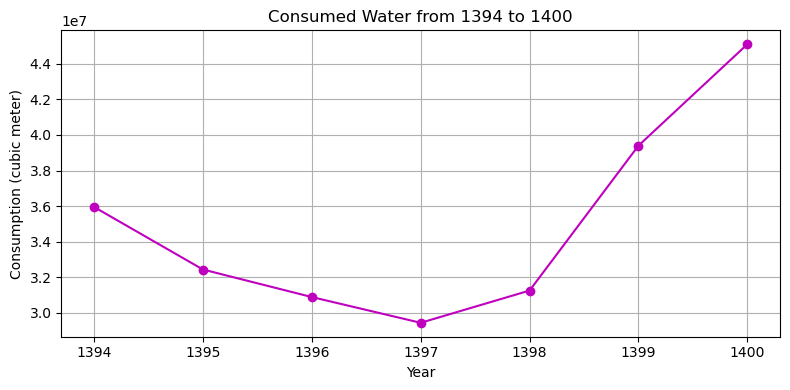

In [18]:
# Reshaping the Sheets from wide to long
Consumed_water = sheeets5.melt(
    id_vars=['کد آیسیک REV4', 'فعالیت'],
    var_name='Year/Variable',
    value_name='Value'
)

Consumed_water['Year'] = (Consumed_water.index % len(years)) + 1394
Consumed_water = Consumed_water.drop(columns=['Year/Variable'])

plt.figure(figsize=(8, 4))
plt.plot(Consumed_water['Year'], Consumed_water['Value'], marker='o', color='m', label='Value')

plt.title('Consumed Water from 1394 to 1400')
plt.xlabel('Year')
plt.ylabel('Consumption (cubic meter)')

plt.grid(True)
plt.tight_layout()
plt.show()

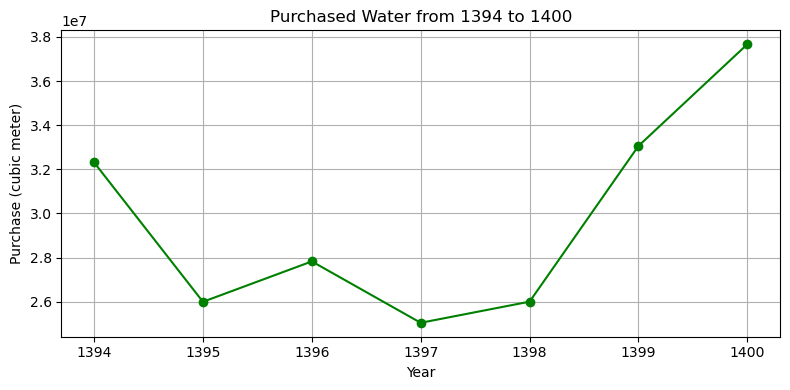

In [19]:
# Reshaping the Sheets from wide to long
Purchased_water = sheeets7.melt(
    id_vars=['کد آیسیک REV4', 'فعالیت'],
    var_name='Year/Variable',
    value_name='Value'
)

Purchased_water['Year'] = (Purchased_water.index % len(years)) + 1394
Purchased_water = Purchased_water.drop(columns=['Year/Variable'])

plt.figure(figsize=(8, 4))
plt.plot(Purchased_water['Year'], Purchased_water['Value'], marker='o', color='g', label='Value')

plt.title('Purchased Water from 1394 to 1400')
plt.xlabel('Year')
plt.ylabel('Purchase (cubic meter)')

plt.grid(True)
plt.tight_layout()
plt.show()

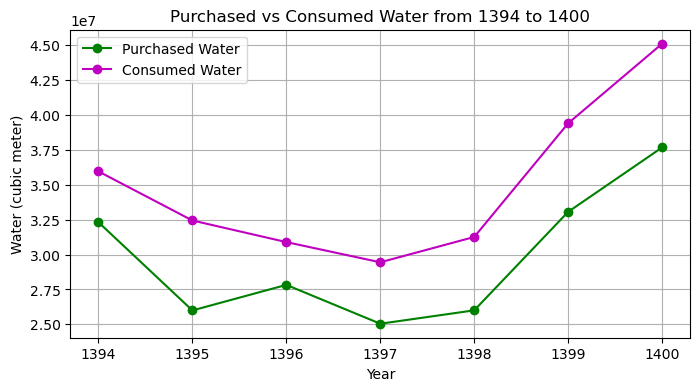

In [20]:
# Reshaping the Sheets from wide to long for Purchased Water
Purchased_water = sheeets7.melt(
    id_vars=['کد آیسیک REV4', 'فعالیت'],
    var_name='Year/Variable',
    value_name='Value'
)

Purchased_water['Year'] = (Purchased_water.index % len(years)) + 1394
Purchased_water = Purchased_water.drop(columns=['Year/Variable'])

# Reshaping the Sheets from wide to long for Consumed Water
Consumed_water = sheeets5.melt(
    id_vars=['کد آیسیک REV4', 'فعالیت'],
    var_name='Year/Variable',
    value_name='Value'
)

Consumed_water['Year'] = (Consumed_water.index % len(years)) + 1394
Consumed_water = Consumed_water.drop(columns=['Year/Variable'])

# Plot both datasets together
plt.figure(figsize=(8, 4))

# Plot for Purchased Water
plt.plot(Purchased_water['Year'], Purchased_water['Value'], marker='o', color='g', label='Purchased Water')

# Plot for Consumed Water
plt.plot(Consumed_water['Year'], Consumed_water['Value'], marker='o', color='m', label='Consumed Water')

# Add title and labels
plt.title('Purchased vs Consumed Water from 1394 to 1400')
plt.xlabel('Year')
plt.ylabel('Water (cubic meter)')

plt.grid(True)
plt.legend()
plt.show()


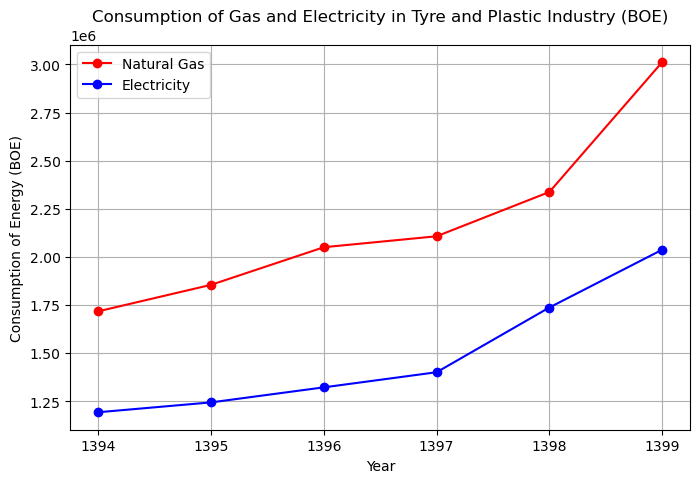

In [ ]:
# Reshaping the Sheets from wide to long
elec_gas = sheets7.melt(
    id_vars=['کد آیسیک REV4', 'فعالیت'],
    var_name='متغیر', 
    value_name='میزان مصرف برحسب بشکه نفت خام'
)

unique_vars = ['گاز طبیعی', 'نفت کوره', 'گازوئیل', 'بنزین', 'نفت سفید', 'گاز مایع', 'زغال سنگ و زغال چوب', 'برق خریداری شده']


updated_values = []
while len(updated_values) < len(elec_gas):
    for var in unique_vars:
        for year in years:
            updated_values.append(f"{var} {year}")
            if len(updated_values) == len(elec_gas):
                break
        if len(updated_values) == len(elec_gas):
            break

elec_gas['متغیر'] = updated_values


elec_gas['سال'] = elec_gas['متغیر'].str.extract(r'(\d{4})') 
elec_gas['سال'] = elec_gas['سال'].astype(int)

for var in unique_vars:
    elec_gas[var] = elec_gas[elec_gas['متغیر'].str.contains(var)]['میزان مصرف برحسب بشکه نفت خام'].reset_index(drop=True)

elec_gas = elec_gas.dropna(subset=unique_vars, how='all')
elec_gas = elec_gas.iloc[:-1]
elec_gas = elec_gas[['کد آیسیک REV4', 'فعالیت', 'سال', 'گاز طبیعی', 'نفت کوره', 'گازوئیل', 'بنزین', 'نفت سفید', 'گاز مایع', 'زغال سنگ و زغال چوب', 'برق خریداری شده']]

# Plotting
plt.figure(figsize=(8, 5))

variables_to_plot = ['گاز طبیعی', 'برق خریداری شده']
labels = ['Natural Gas', 'Electricity']

for var, label, color in zip(variables_to_plot, labels, ['red', 'blue']):
    data = elec_gas[['سال', var]].dropna() 

    plt.plot(data['سال'], data[var], label=label, marker='o', color=color)

plt.title('Consumption of Gas and Electricity in Tyre and Plastic Industry (BOE)')
plt.xlabel('Year')
plt.ylabel('Consumption of Energy (BOE)')

plt.grid(True)
plt.legend()
plt.show()